# Car Ads - Exploratory Data Analysis

In [2]:
import gdown
import os
from pandas_profiling import ProfileReport

# https://drive.google.com/open?id=1v2Wi2Muyf3iz0YyQExe9_fIZXC2fQ_mM

url = f'https://drive.google.com/uc?id=1v2Wi2Muyf3iz0YyQExe9_fIZXC2fQ_mM'
output = 'car-data.zip'
if not os.path.exists(output):
    gdown.download(url, output, quiet=False)
    !unzip car-data.zip

Downloading...
From: https://drive.google.com/uc?id=1v2Wi2Muyf3iz0YyQExe9_fIZXC2fQ_mM
To: /content/car-data.zip
92.5MB [00:01, 77.5MB/s]


Archive:  car-data.zip
  inflating: all_anonymized_2015_11_2017_03.csv  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline

## Load data

In [5]:
import os

root_dir = '.'
filename = 'all_anonymized_2015_11_2017_03.csv'

filepath = os.path.join(root_dir, filename)

df = pd.read_csv(filepath)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [7]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


## 1. Variable Identification

### Columns and data-types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


In [9]:
df.fuel_type.value_counts()

gasoline    902222
diesel      768207
electric     26350
lpg           7403
cng           1124
Name: fuel_type, dtype: int64

#### Categorical Variables

1. maker
2. model
3. body_type
4. color_slug
5. transmission
6. fuel_type

#### Numerical Variables

1. mileage
2. manufacture_year
3. engine_displacement
4. engine_power
5. stk_year
6. door_count
7. seat_count
8. price_eur

In [0]:
categorical_features = ['maker', 'model', 'body_type', 'color_slug', 'transmission', 'fuel_type']

numerical_features = ['mileage', 'manufacture_year', 'engine_displacement', 'engine_power', 'stk_year',
                      'door_count', 'seat_count', 'price_eur']

## 2. Univariate Analysis

### 2.1 Categorical Data

Non-graphical EDA

In [11]:
cat_d = pd.DataFrame(index=["Count", "Percentage"])

col_vals = [[]] * len(categorical_features)
cat_dfs = []

for catf in categorical_features:
    counts = df[catf].value_counts()
    percentages = 100 * counts/counts.sum()
    cat_df = pd.DataFrame({
        'counts': counts,
        'percentages': percentages
    }, index=counts.index).T
    print(f'Feature: {catf}')
    print(f'Total categories: {df[catf].nunique()}')
    print(cat_df)
    print(f'Total: {counts.sum()}', end='\n\n')
    cat_dfs.append(cat_df)
#     print(f'Category: {catf}')
#     print(type(counts))

Feature: maker
Total categories: 46
                     skoda     volkswagen  ...  rolls-royce  aston-martin
counts       313830.000000  297256.000000  ...    46.000000     22.000000
percentages      10.343781       9.797505  ...     0.001516      0.000725

[2 rows x 46 columns]
Total: 3033997

Feature: model
Total categories: 1012
                   octavia         fabia  ...       q60  cls350-cgi
counts       129563.000000  91401.000000  ...  1.000000    1.000000
percentages       5.354836      3.777602  ...  0.000041    0.000041

[2 rows x 1012 columns]
Total: 2419551

Feature: body_type
Total categories: 9
                    other        compact  ...  convertible  transporter
counts       1.964289e+06  241948.000000  ...  5332.000000  4440.000000
percentages  8.083500e+01       9.956716  ...     0.219424     0.182716

[2 rows x 9 columns]
Total: 2429998

Feature: color_slug
Total categories: 14
                    black         white  ...     violet      bronze
counts       42931

Graphical EDA for categorical data

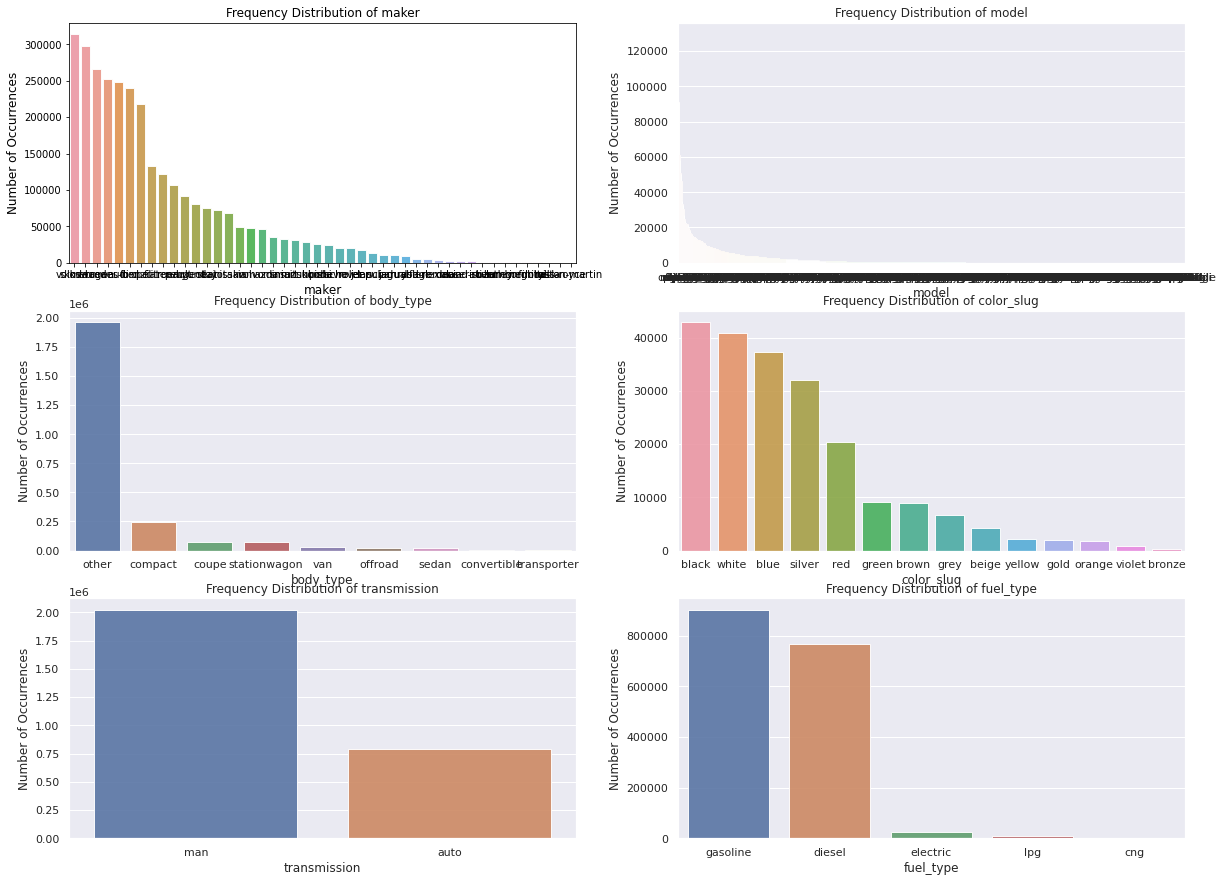

In [12]:
plt.figure(figsize=(20, 15))

ncols = 2
nrows = int(np.ceil(len(categorical_features)/ncols))

for i, catf in enumerate(categorical_features):
    var_count = df[catf].value_counts()
    plt.subplot(nrows, ncols, i+1)
    sns.set(style="darkgrid")
    sns.barplot(var_count.index, var_count.values, alpha=0.9)
    plt.title(f'Frequency Distribution of {catf}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(catf, fontsize=12)

plt.show()

Explore the model feature.

In [13]:
model_counts = df['model'].value_counts()

print(model_counts.median())
model_counts[model_counts > 3].shape
model_counts[model_counts > 194].shape

194.5


(506,)

### Numerical  or quantitative variable

Characteristic of quantitative variables are:

1. Center

2. Spread

3. Modality (Number of picks in the pdf)

4. Shape (heaviness of tails)

5. Outliers

Sample statistics:

1. Sample mean
2. Sample variance
3. Sample standard deviation
4. Sample skewness
5. Sample kurtosis

Non-graphical

In [14]:
df[numerical_features].head()

,mileage,manufacture_year,engine_displacement,engine_power,stk_year,door_count,seat_count,price_eur
0,151000.0,2011.0,2000.0,103.0,None,5,7,10584.75
1,143476.0,2012.0,2000.0,81.0,None,5,5,8882.31
2,97676.0,2010.0,1995.0,85.0,None,5,5,12065.06
3,111970.0,2004.0,1200.0,47.0,None,5,5,2960.77
4,128886.0,2004.0,1200.0,47.0,None,5,5,2738.71


In [15]:
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mileage              float64
 1   manufacture_year     float64
 2   engine_displacement  float64
 3   engine_power         float64
 4   stk_year             object 
 5   door_count           object 
 6   seat_count           object 
 7   price_eur            float64
dtypes: float64(5), object(3)
memory usage: 216.9+ MB


In [0]:
# replace None to nan
df_num = df[numerical_features].replace('None', np.nan)

for numf in numerical_features:
    df_num[numf] = pd.to_numeric(df_num[numf])

In [0]:
ncols = 3
nrows = len(numerical_features)

plt.figure(figsize=(20, 50))

df_num_all = df[numerical_features]

for i, numf in enumerate(numerical_features):
    df_col = df_num_all[numf]

    # zero fill both nan and none
    df_col = df_col.replace('None', np.nan)
    df_col_zerofill = df_col.fillna(0)
    df_col_zerofill = pd.to_numeric(df_col_zerofill)

    plt.subplot(nrows, ncols, ncols * i + 1)
    df_col_zerofill.hist()
    plt.title('Assigned NaN and None to zero')
    plt.xlabel(numf)

    # drop nan, zero fill none
    df_col_nandrop = df_col.dropna()
    df_col_nandrop = df_col_nandrop.replace('None', 0)
    df_col_nandrop = pd.to_numeric(df_col_nandrop)

    plt.subplot(nrows, ncols, ncols * i + 2)
    df_col_nandrop.hist()
    plt.title('Drop NaN, None=0 values')
    plt.xlabel(numf)

    # drop both nan and none
    df_col_alldrop = df_col.replace('None', np.nan)
    df_col_alldrop = df_col_alldrop.dropna()
    df_col_alldrop = pd.to_numeric(df_col_alldrop)
    plt.subplot(nrows, ncols, ncols * i + 3)
    df_col_alldrop.hist()
    plt.title('Drop both NaN and None values')
    plt.xlabel(numf)

plt.show()

In [0]:
ncols = 2
nrows = int(np.ceil(len(numerical_features)/ncols))

plt.figure(figsize=(20, 50))

df_numdrop = df_num.dropna()

for i, numf in enumerate(numerical_features):
    col = pd.to_numeric(df_numdrop[numf])
    plt.subplot(nrows, ncols, i+1)
    plt.boxplot(col)
    plt.title(numf)

plt.show()

### Bi-variate analysis

1. Scatter plot for numerical data

In [0]:
df_num = df[numerical_features].replace('None', np.nan)

# Correlations
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

corr

In [0]:
for numf in numerical_features:
    df_num[numf] = pd.to_numeric(df_num[numf])
sns.pairplot(df_num)

## Missing values identification and treatment

In [0]:
# Number of nan values for individual columns
df.isna().sum()

In [0]:
# Number of None values for individual columns
df[df.eq('None')].count()

In [0]:
# change none value to nan value
df_rnone = df.replace('None', np.nan, regex=True)
print(df_rnone.isna().sum())